# Lesson 0016 - MNIST Classification Deep Neural Network (II)
In [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb) we created our first neural network. In [lesson 0015](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0015_mnist_classification_deep_neural_network.ipynb) we tried to improve the performance by making the network deeper, but the deeper network did not perform so well.<br>
This time, we will try a deep neural network with only $2$ hidden layers.<br>
For this, we will steal code from [lesson 0015](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0015_mnist_classification_deep_neural_network.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


In [5]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [6]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

train_y_f = np.zeros( shape = [ 60000, 10 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )

test_y_f = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_f[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_f[ i, test_y[ i ] ] = 1.0
    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

train_y = train_y_f

test_x = test_x_f

test_y = test_y_f

We will create a neural network with $28*28$ nodes in the first hidden layer, and $512$ neurons in the second hidden layer. As in [lesson 0015](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0015_mnist_classification_deep_neural_network.ipynb), we will use the leaky ReLu activation function.<br>
We will train with $100$ randomly drawn training data for $50000$ iterations with a learning rate of $0.001$.

In [7]:


x_tf = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )




W_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28, 28 * 28 ] ) )

b_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28 ] ) )

layer_2 = tf.nn.leaky_relu( tf.matmul( x_tf, W_tf_1 ) + b_tf_1 )




W_tf_2 = tf.Variable( tf.truncated_normal( [ 28 * 28, 512 ] ) )

b_tf_2 = tf.Variable( tf.truncated_normal( [ 512 ] ) )

layer_3 = tf.nn.leaky_relu( tf.matmul( layer_2, W_tf_2 ) + b_tf_2 )




W_tf_3 = tf.Variable( tf.truncated_normal( [ 512, 10 ] ) )

b_tf_3 = tf.Variable( tf.truncated_normal( [ 10 ] ) )

layer_4 = tf.nn.leaky_relu( tf.matmul( layer_3, W_tf_3 ) + b_tf_3 )




cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = layer_4, labels = y_tf ) )




gd = tf.train.GradientDescentOptimizer( 0.001 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( layer_4, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )



Instructions for updating:
Colocations handled automatically by placer.


In [8]:
sess = tf.Session()





progress_train = []

progress_train_current = []

progress_test = []
 
    
    
    
    
sess.run( tf.global_variables_initializer() )






for i in range( 50000 ):
                
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
                
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
        
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
        
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
        
    progress_train_current.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
        
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )

In [9]:
sess.close()

Text(0, 0.5, 'Accuracy (%)')

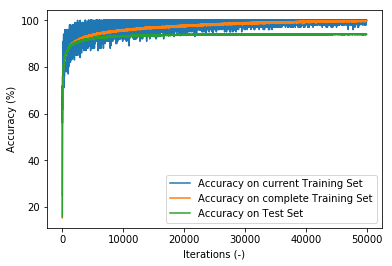

In [10]:
plt.plot( progress_train_current, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Text(0, 0.5, 'Accuracy on Test Set (%)')

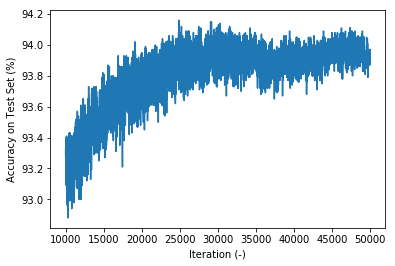

In [11]:
plt.plot( range( 10000, 50000 ), progress_test[ 10000 : 50000 ] )

plt.xlabel( "Iteration (-)" )

plt.ylabel( "Accuracy on Test Set (%)" )

In the last two plots, we see the __overfitting__ on the training set. Since the network learns the complete training set with all its peculiarities, the variance of the performance on the training set vanishes and the accuracy on the training set approaches almost $100\%$. At the same time, the performance on the test set reaches at iteration $30000$ its maximum.<br>
With this model, we cannot perform better, <br>
Class dismissed.